<a href="https://colab.research.google.com/github/146790g/CIFAR10-2CNN/blob/master/CIFAR10_2CNN_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 2CNN Feature Extraction

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow 2.x.

In [2]:
%tensorflow_version 2.x


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import cifar10

## データの読み込み


In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170500096/170498071 [==============================] - 2s 0us/step


## モデルの読み込み

In [6]:
result_dir = '/content/gdrive/My Drive/Colab Notebooks/CIFAR10/results'  
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

model=load_model(os.path.join(result_dir,'CIFAR10_2CNN_model.h5'))

model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

## 特徴量の抽出

In [7]:
x=test_images[0]
x2 = np.expand_dims(x, axis=0)


layer_outputs = [model.get_layer('flatten').output,
                 model.get_layer('hidden').output]

model2 = models.Model(inputs=model.input, outputs=layer_outputs)

flatten_output, hidden_output = model2.predict(x2)

print(x.shape)
print(x2.shape)
print(flatten_output.shape)
print(hidden_output.shape)


(32, 32, 3)
(1, 32, 32, 3)
(1, 4096)
(1, 512)


## Validation Dataの画像すべてに対して、その特徴量データを取得する
その特徴量データを、featureと命名する

In [8]:
model2 = models.Model(inputs=model.input, outputs=layer_outputs)

flatten_output, hidden_output = model2.predict(test_images)

print(flatten_output.shape)
print(hidden_output.shape)
print(type(hidden_output))
print(hidden_output[1].shape)

feature=hidden_output

print(feature.shape)

(10000, 4096)
(10000, 512)
<class 'numpy.ndarray'>
(512,)
(10000, 512)


## 特徴量データに基づいて、tSNEプロットを作成する

In [11]:
from sklearn.manifold import TSNE
digits2d = TSNE(n_components=2).fit_transform(feature)

In [17]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(test_labels)

print(test_labels.shape)
print(type(test_labels))

label=test_labels.reshape(10000,)

print(label.shape)



[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)
<class 'numpy.ndarray'>
(10000,)


In [19]:



target2 = digits2d[label == 2]
print(target2.shape)

target1 = digits2d[label == 1]
print(target1.shape)

(1000, 2)
(1000, 2)


Text(0.5, 1.0, 'tSNE Plot')

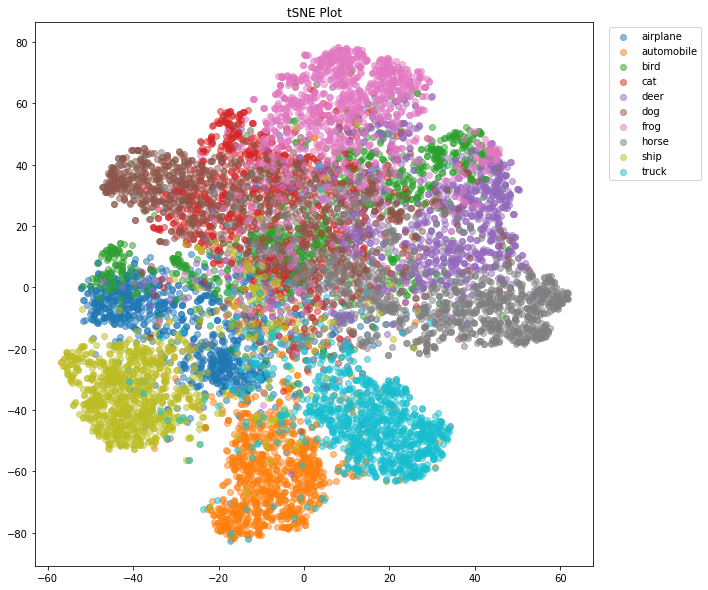

In [22]:
from matplotlib import pylab as plt

name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

f, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(10):
    target = digits2d[label == i]
    ax.scatter(x=target[:, 0], y=target[:, 1], label=name[i], alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('tSNE Plot')

【考察】

１０種類の画像データについて、2層CNNモデルによって、モデル化をして、特徴量を抽出して、それらの特徴量について、tSNEプロットを作成したところ、１０種類に適切に分類
されることが確認された。

しかしながら、そのうち、catについては、ひとつの塊としてでなく、広く分散していることから、判別が難しいと推測される。